In [1]:
# -*- coding: utf 8

from matplotlib import pyplot as plt
from matplotlib import ticker
from datetime import datetime
import pandas as pd
import numpy as np

plt.style.use('seaborn-colorblind')
plt.ion()

Dados obtidos do site https://brasil.io/dataset/covid19/files/

Arquivo 'caso_full.csv'

Data de captura: 2021-02-11

In [2]:
players = pd.read_csv('players.csv')
players.head()

,player_id,username,country,followers,last_online,joined,is_streamer,status,title,best_rapid_rating,best_blitz_rating,best_bullet_rating
0,5999382,-whitetiger-,IN,4,1611593481,1319353379,False,basic,None,1733,1487,1345
1,113902696,00000000000a5,IN,2,1611550728,1611071564,False,basic,None,1298,0,0
2,106710230,00000000a,IN,5,1611585871,1608800475,False,basic,None,1016,0,0
3,103508064,00000000oooooooo,IN,0,1611590946,1607689710,False,basic,None,988,0,0
4,48828546,000000pankaj,IN,5,1611574958,1534435936,False,basic,None,1171,1454,1041


In [3]:
jog = players.copy()
correto = np.array(jog["joined"])
l = []
for i in range(0,len(correto)):
  l.append(datetime.utcfromtimestamp(correto[i]).strftime('%Y-%m-%d'))
  
jog["joined"] = l
jog.head()

,player_id,username,country,followers,last_online,joined,is_streamer,status,title,best_rapid_rating,best_blitz_rating,best_bullet_rating
0,5999382,-whitetiger-,IN,4,1611593481,2011-10-23,False,basic,None,1733,1487,1345
1,113902696,00000000000a5,IN,2,1611550728,2021-01-19,False,basic,None,1298,0,0
2,106710230,00000000a,IN,5,1611585871,2020-12-24,False,basic,None,1016,0,0
3,103508064,00000000oooooooo,IN,0,1611590946,2020-12-11,False,basic,None,988,0,0
4,48828546,000000pankaj,IN,5,1611574958,2018-08-16,False,basic,None,1171,1454,1041


In [4]:
datas = jog.groupby("joined").count()
datas['new_players'] = datas['player_id']
datas = datas.drop(columns=['player_id', 'username', 'country', 'followers', 'last_online', 'is_streamer', 'status', 'title', 'best_rapid_rating', 'best_blitz_rating', 'best_bullet_rating'])

In [5]:
#Função que retorna os novos jogadores em um determinado mês, a partir de 2015 até 2020 ou no ano de 2020

def newPlayersMes(mes, pandemia=False):
    players_mes = datas.copy()
    players_mes = players_mes.reset_index()
    players_mes = players_mes.rename(columns={"joined": "date"})
    filtro = []
    for i in range(len(players_mes)):
        if pandemia:
            filtro.append(players_mes['date'][i][5:7] == mes and int(players_mes['date'][i][0:4]) == 2020)
        else:
            filtro.append(players_mes['date'][i][5:7] == mes and int(players_mes['date'][i][0:4]) < 2020 and int(players_mes['date'][i][0:4]) > 2015)
    players_mes = players_mes[filtro]
    return players_mes

In [6]:
#Novos jogadores no mês de janeiro, entre 2015 e 2020

newPlayersMes('01')

,date,new_players
3129,2016-01-01,124
3130,2016-01-02,121
3131,2016-01-03,118
3132,2016-01-04,147
3133,2016-01-05,127
...,...,...
4251,2019-01-27,363
4252,2019-01-28,349
4253,2019-01-29,364
4254,2019-01-30,342


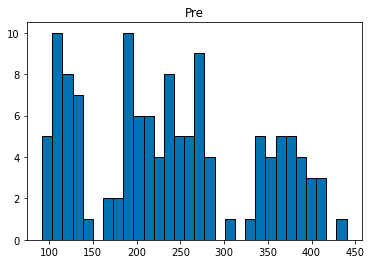

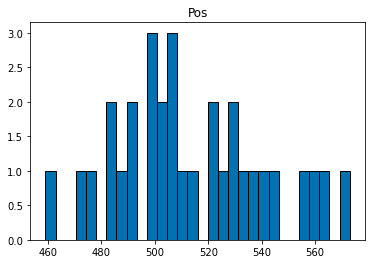

In [7]:
#Histograma com os novos jogadoes no mês de janeiro entre 2015 e 2020 (pré pandemia) e em 2020 (pós pandemia)

janeiroPre = newPlayersMes('01')['new_players']
janeiroPos = newPlayersMes('01', True)['new_players']
plt.hist(janeiroPre, ec='black', bins=30)
plt.title('Pre')
plt.show()
plt.hist(janeiroPos, ec='black', bins=30)
plt.title('Pos')
plt.show()

In [8]:
#Função que calcula o intervalo de confiança a partir da fórmula

def calcula_IC(df):
    n = df.count()
    desvio = np.std(df, ddof = 1)
    media = np.mean(df)
    inferior = media - 1.96*(desvio/(n**(1/2))) # 5%
    superior = media + 1.96*(desvio/(n**(1/2)))
    return [ inferior, superior]

In [9]:
#Intervalo de confiança da média de novos jogadores em janeiro, pré pandemia

icJaneiroPre = calcula_IC(janeiroPre)
icJaneiroPre

[221.1719496153434, 254.79579232014044]

In [10]:
np.mean(janeiroPre)

237.98387096774192

In [11]:
#Intervalo de confiança da média de novos jogadores em janeiro, pós pandemia

icJaneiroPos = calcula_IC(janeiroPos)
icJaneiroPos

[503.66367724052907, 523.626645340116]

In [12]:
np.mean(janeiroPos)

513.6451612903226

In [13]:
#Teste AB

def teste_ab(df_hyp_menor, df_hyp_maior):
    return calcula_IC(df_hyp_menor)[1] < calcula_IC(df_hyp_maior)[0]

In [14]:
#Janeiro
teste_ab(newPlayersMes('01')['new_players'], newPlayersMes('01', True)['new_players'])

True

In [15]:
print("Durante 2020 a média de novos jogadores saiu do intervalo de confiança no mês")
for i in range(1,13):
    mes = str(i)
    if i < 10:
        mes = '0' + mes
    print(mes + ': ', teste_ab(newPlayersMes(mes)['new_players'], newPlayersMes(mes, True)['new_players']))

Durante 2020 a média de novos jogadores saiu do intervalo de confiança no mês
01:  True
02:  True
03:  True
04:  True
05:  True
06:  True
07:  True
08:  True
09:  True
10:  True
11:  True
12:  True


In [16]:
print("Durante 2020 a média de novos jogadores saiu do intervalo de confiança no mês")
ints = [[],[]]
medias = []
for i in range(1,13):
    mes = str(i)
    if i < 10:
        mes = '0' + mes
    ic = calcula_IC(newPlayersMes(mes)['new_players'])
    mean = np.mean(newPlayersMes(mes, True)['new_players'])
    print(mes + ': ', ic, mean, (ic[0] <= mean and ic[1] >= mean))
    ints[0].append(ic[0])
    ints[1].append(ic[1])
    medias.append(mean)

Durante 2020 a média de novos jogadores saiu do intervalo de confiança no mês
01:  [221.1719496153434, 254.79579232014044] 513.6451612903226 False
02:  [214.8340619779255, 246.13938934950812] 527.3448275862069 False
03:  [219.90392284354078, 257.61220618871727] 1066.0645161290322 False
04:  [210.10507696704667, 249.9282563662867] 1591.5 False
05:  [202.56508104366014, 241.85427379504955] 1470.967741935484 False
06:  [184.18816599476125, 217.0451673385721] 1553.6333333333334 False
07:  [191.7223068438293, 222.97124154326747] 1312.8709677419354 False
08:  [224.93001646658035, 260.408693210839] 1285.7096774193549 False
09:  [224.03621661922463, 257.44711671410874] 1199.8 False
10:  [230.41804783217802, 263.84001668395103] 1624.5806451612902 False
11:  [273.96808312198146, 317.19858354468516] 5718.966666666666 False
12:  [317.88526814776867, 363.21150604577974] 7659.967741935484 False


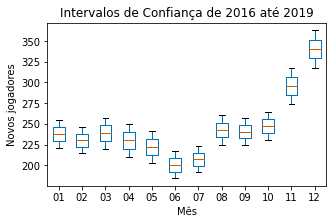

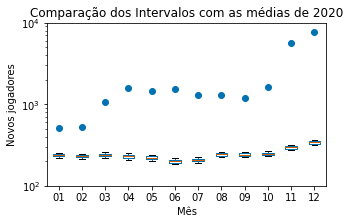

In [17]:
meses = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
zz = np.array(ints)
dd = pd.DataFrame(zz, columns=meses)
plt.figure(figsize=(5,3))
dd.boxplot(grid=False)
plt.title('Intervalos de Confiança de 2016 até 2019')
plt.xlabel('Mês')
plt.ylabel("Novos jogadores")
plt.savefig('ics.pdf')
plt.show()

plt.figure(figsize=(5,3))
plt.yscale('log')
dd.boxplot(grid=False)
plt.ylim(100,10000)
plt.scatter(x=range(1,13), y=medias, alpha=1)
plt.title('Comparação dos Intervalos com as médias de 2020')
plt.xlabel('Mês')
plt.ylabel("Novos jogadores")
plt.savefig('icsmedias.pdf')
plt.show()